# Выделение групп пользователей на основе поведения
**Цель работы:** выделить целевую группу для увеличения монетизации приложения.

[Ссылка на презентацию](https://drive.google.com/file/d/1wLgaLFEuH8V3NnNax4OdiZu6-zT3Q2TO/view?usp=sharing) \
[Ссылка на дашборд](https://public.tableau.com/app/profile/veronika4962/viz/fp_16805622420110/Dashboard1)

**Содержание:**
- 1. [Выгрузка данных](#start)
- 2. [Предобработка данных](#preprocessing)
    - [2.1 Обрабокта дубликатов](#duplicates)
    - [2.2 Обработка пропусков](#null)
    - [2.3 Обработка типов данных](#type)
    - [2.4 Добавление столбцов](#columns)
    - [2.5 Объединение первичных датасетов](#merge)
    - [2.6 Вывод](#2.6)
- 3. [Исследовательский анализ данных](#analysis)
    - [3.1 Техническая часть](#tex_part)
    - [3.2 Retantion rate](#3.1)
    - [3.3 Время, проведенное в приложении](#3.2)
    - [3.4 Частота действий](#3.3)
    - [3.5 Конверсия в целевое действие](#3.4)
    - [3.6 Вывод](#3.5)
- 4. [Сегментация](#segments)
    - [4.1 Retantion rate](#4.1)
    - [4.2 Конверсия в целевое действие](#4.2)
    - [4.3 Вывод](#4.3)
- 5. [Проверка гипотез](#hypotheses)
    - [5.1 Гипотеза 1](#5.1)
    - [5.2 Гипотеза 2](#5.2)
    - [5.3 Вывод](#5.3)
- 6. [Вывод](#conclusion)


## Выгрузка данных

In [34]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates
from scipy import stats as st
import math as mth

warnings.filterwarnings("ignore")


In [35]:
mobile_sourсes = pd.read_csv('mobile_soures.csv')
mobile_dataset = pd.read_csv('mobile_dataset.csv')

In [36]:
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [37]:
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<a id="preprocessing"></a> 
## Предобработка

<a id="null"></a> 
### Обработка пропущенных значений

In [38]:
pd.DataFrame(round(mobile_sourсes.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
userId,0.000000
source,0.000000


In [39]:
pd.DataFrame(round(mobile_dataset.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
event.time,0.000000
event.name,0.000000
user.id,0.000000


Пропущенных значений в данных не обнаружено.

<a id="type"></a> 
### Обработка типов данных
Посмотрим в каких типах представлены данные:

In [40]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [41]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Все представленные типы данных корректны за исключением столбца `event.time`. Его следует привести к типу datetime.

In [42]:
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time']).astype('datetime64[ns]')

# check 
mobile_dataset.dtypes

event.time    datetime64[ns]
event.name            object
user.id               object
dtype: object

<a id="duplicates"></a> 
### Обработка дубликатов

In [43]:
mobile_sourсes.duplicated().sum() 

0

In [44]:
mobile_dataset.duplicated().sum() 

0

Явных дубликатов в данных не обнаружено.

In [45]:
print('Количество строк в датасете:')
display(mobile_sourсes['userId'].count())

print('Число уникальных наименований:')
display(mobile_sourсes['userId'].nunique()) # число уникальных наименований

Количество строк в датасете:


4293

Число уникальных наименований:


4293

In [46]:
mobile_dataset['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

В датасете mobile_dataset в столбце `event.name` обнаружено два значения одинаковых по смыслу: 'contacts_show' и 'show_contacts'. Обединим два этих значения в одно:

In [47]:
mobile_dataset['event.name'] = mobile_dataset['event.name'].replace('show_contacts', 'contacts_show')

В столбце `event.name` есть значения search_1 — search_7 — разные события, связанные с поиском по сайту. В данной работе разница между ними не учитывается, поэтому объединим эти события.

In [48]:
for i in ['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7' ]:
    mobile_dataset['event.name'] = mobile_dataset['event.name'].replace(i, 'search')

<a id="columns"></a> 
### Проверка корректности наименований колонок
Приведем названия колонок к общепринятому виду:

In [49]:
mobile_sourсes = mobile_sourсes.rename(columns={'userId':'user_id'})
mobile_dataset = mobile_dataset.rename(columns={'event.time':'event_time','event.name':'event_name','user.id':'user_id'})

<a id="merge"></a> 
### Объединение двух датасетов в один
Объединим две исходные таблицы mobile_sourсes и mobile_dataset в одну:

In [50]:
df = mobile_sourсes.merge(mobile_dataset, on='user_id')
df.head()

,user_id,source,event_time,event_name
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show


<a id="2.6"></a> 
### Вывод
На данном этапе были проделаны следующие шаги: 
- Приведение к нужным типам данных (столбец с датой и временем);
- Анализ пропусков в данных (пропусков не обнаружено);
- Обработка дубликатов (объединение значений 'contacts_show' и 'show_contacts' в столбце `event_name`, а также 'search_1' — 'search_7'  в 'search');
- Приведение имен столбцов к общепринятому виду.

<a id="analysis"></a> 
## Исследовательский анализ
Данный этап нацелен на исследование общего поведения пользователей по 4-ем метрикам: retention rate; время, проведённое в приложении; частота действий; конверсия в целевое действие — просмотр контактов.

<a id="tex_part"></a> 
### Техническая часть
В данной части написаны собственные функции, которые используются в [настоящем разделе](#analysis) и в разделе ["Сегментация"](#segments):
- функция plt_design – для оформления графиков, 
- функция RR – для рассчета retention rate,
- функция conversion – для рассчета конверсии.

In [51]:
# функция для оформления графиков
def plt_design(title='title',
               title_size=20, 
               xlabel='xlabel', 
               ylabel='ylabel',
               fontsize=16, # размер шрифта подписей к осям
               ticks_size=14, # размер шрифта делений на осях
               xrot=0, # наклон подписей делений
               yrot=0,
               ):
    
    plt.title(title, fontsize = title_size)
    plt.xlabel(xlabel, fontsize=fontsize) 
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize = ticks_size, rotation=xrot)
    plt.yticks(fontsize = ticks_size, rotation=yrot)
    
    
    return
plt.show();

In [76]:
# функция для рассчета RR:
def RR(data):
    # запишем только дату:
    data['active_date'] = data['event_time'].astype('datetime64[W]')

    # группируем и нахдим первый заход каждого пользователя:
    first_ts = data.groupby('user_id').agg({'event_time':'min'}).reset_index()
    first_ts = first_ts.rename(columns={'event_time':'first_ts'})
    first_ts['first_ts'] = first_ts['first_ts'].astype('datetime64[W]')
    
    # объединяем датасеты:
    data = first_ts.merge(data, on='user_id')

    # находим лайфтайм:
    data['lifetime'] = data['active_date'] - data['first_ts']
    
    # расчитываем retention rate
    retention = data.pivot_table(
        index=['first_ts'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    

    # вычисляем размеры когорт
    cohort_sizes = (
        data.groupby('first_ts')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )

    # объединяем размеры когорт и таблицу удержания
    retention = cohort_sizes.merge(
        retention, on='first_ts', how='left'
    ).fillna(0)

    # делим данные таблицы удержания на размеры когорт
    retention = retention.div(retention['cohort_size'], axis=0).drop(columns=['cohort_size'])

    
    # строим хитмэп:
    
    plt.figure(figsize=(10, 4))  # задаём размер графика
    heat_map = sns.heatmap(
        retention,  
        annot=True,  # включаем подписи
        fmt='.2%',  # переводим значения в проценты
    )
    

    # оформление:
    plt_design(title='Тепловая карта удержания',
                  title_size=20, 
                  xlabel='Лайфтайм', 
                  ylabel='Когорта',
                  fontsize=16, # размер шрифта подписей к осям
                  ticks_size=14, # размер шрифта делений на осях
                  xrot=30, # наклон подписей делений
                  yrot=0,
                  );
    
    return retention


In [53]:
# функция для подсчета конверсии:
def conversion(data, segment_name=''):
    conversion = round((data.loc[data['event_name'] == 'contacts_show', 'user_id'].nunique() / data['user_id'].nunique()*100), 2)
    print(f'Конверсия всех пользователей {segment_name} в пользователей, дошедших до действия "contact_show": {conversion}%')

<a id="3.1"></a> 
### Retention rate
Retention Rate, или коэффициент удержания, показывает, как долго клиенты остаются с компанией. Будем рассматривать недельные когорты. 

,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.270567,0.168190,0.109689,0.071298
2019-10-10,1.0,0.233929,0.154464,0.070536,0.000000
2019-10-17,1.0,0.240317,0.088908,0.000000,0.000000
2019-10-24,1.0,0.173570,0.000000,0.000000,0.000000
2019-10-31,1.0,0.000000,0.000000,0.000000,0.000000


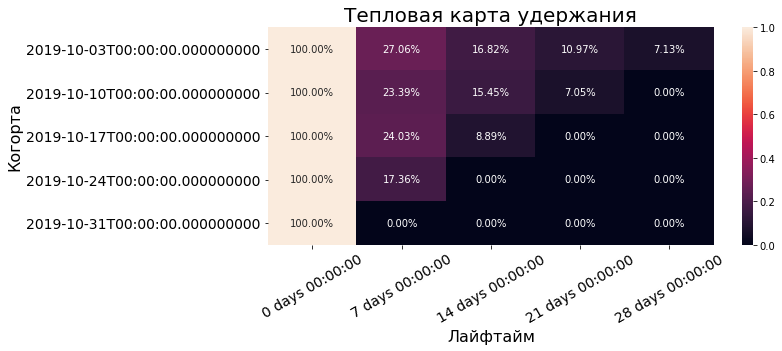

In [77]:
RR(df)

- Сравнивая 7 день всех когорт, видим: максимальный показатель удержания у первой когорты (27%), минимальный у 4-ой когорты (17,4%). То есть спустя неделю наибольшее число вернувшихся в приложение пользователей – пользователи из первой когорты. Также видно, что показатели удержания на 7 день между первыми тремя когортами отличается не сильно (примерно на 3%). 
- Сравним retention rate на 7 день с показателями на 14 день. В первой когорте RR снизиля на 10%, во второй – на 8%, у третьей когорты – наибольшее снижение, разница составляет ≈15%. 
- Разница между RR 21-ого дня у двух первых когорт около 4%. Удержание первой когорты лучше. В первый когорте RR уменьшился на 6%, во второй – примерно на 8%. 
- Только первая когорта "дожила" до 28-ого дня. Всего осталось около 7% всех пользователей. RR 28-ого дня уменьшился на 4% относительно 21-ого дня.

<a id="3.2"></a> 
### Время, проведённое в приложении

В этом пункте нам нужно самим выделить сессии для каждого пользователя. И в этих сессиях посчитать время, проведенное в приложении. 

In [55]:
df.sort_values(['user_id', 'event_time']).head()

,user_id,source,event_time,event_name,active_date
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-03
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-03
2173,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:41:05.722489,tips_show,2019-10-03
2174,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:43:20.735461,tips_show,2019-10-03
2175,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:45:30.917502,tips_show,2019-10-03


Выделим сессии для каждого пользователя. Примем, что сессия – это группа событий для пользователя, между которыми нет интервала в X секунд (или минут). Если между событиями проходит X секунд и более, то следующее событие относится к другой сессии. Здесь задано значение X = 15 минут.

In [56]:
# определим разницу в 15 минут между сессиями:
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('15Min')).cumsum()

# создадим счетчик групп-сессий:
df['session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1
df

,user_id,source,event_time,event_name,active_date,session_id
0,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:00.431357,advert_open,2019-10-03,1
1,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:01.236320,tips_show,2019-10-03,1
2,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:00:07.039334,tips_show,2019-10-03,1
3,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:27.770232,advert_open,2019-10-03,1
4,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07 00:01:34.804591,tips_show,2019-10-03,1
...,...,...,...,...,...,...
74192,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:47.068179,map,2019-10-31,11537
74193,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:46:58.914787,advert_open,2019-10-31,11537
74194,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:01.232230,tips_show,2019-10-31,11537
74195,d157bffc-264d-4464-8220-1cc0c42f43a9,google,2019-11-03 23:47:47.475102,advert_open,2019-10-31,11537


Теперь найдем среднюю продолжительность сессии для каждого пользователя.

In [57]:
# получим таблицу с началом и концом каждой сессии для каждого пользователя:
session_start = df.groupby(['user_id', 'session_id'], as_index=False).agg({'event_time':'min'})
session_end = df.groupby(['user_id', 'session_id'], as_index=False).agg({'event_time':'max'})
sessions = session_start.merge(session_end, on=['user_id', 'session_id'])
sessions.columns = ['user_id', 'session_id', 'start_dt', 'end_dt']

# найдем продолжительность каждой сессии: 
sessions['duration'] =  sessions['end_dt'] - sessions['start_dt']

display(sessions)

,user_id,session_id,start_dt,end_dt,duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,304,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,305,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,306,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,0 days 00:14:59.272096
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,307,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,0 days 00:12:38.171767
4,00157779-810c-4498-9e05-a1e9e3cedf93,6686,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,0 days 00:25:20.787329
...,...,...,...,...,...
11532,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,3011,2019-11-02 18:17:41.386651,2019-11-02 18:17:41.386651,0 days 00:00:00
11533,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,3012,2019-11-02 19:25:53.794029,2019-11-02 19:30:50.471310,0 days 00:04:56.677281
11534,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,3013,2019-11-03 14:32:55.956301,2019-11-03 14:48:44.263356,0 days 00:15:48.307055
11535,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,3014,2019-11-03 15:36:01.007440,2019-11-03 15:51:57.899997,0 days 00:15:56.892557


In [58]:
# общая продолжительность всех сессий в сумме для каждого пользователя
ses_dur_sum = sessions.groupby('user_id', as_index=False)['duration'].sum()

# число сессий для каждого пользователя 
ses_cnt = sessions.groupby('user_id', as_index=False)['session_id'].nunique()

# объединяем 
ses_dur_avg = ses_dur_sum.merge(ses_cnt, on='user_id')
ses_dur_avg.columns=['user_id', 'duration_sum', 'session_cnt']

# делим общую продолжительность всех сессий на их количество (для каждого пользователя), 
# получаем среднюю продолжительность одной сессии для каждого пользователя
ses_dur_avg['duration_avg'] = (ses_dur_avg['duration_sum']/ses_dur_avg['session_cnt']).round('min').astype('timedelta64[m]')
ses_dur_avg


,user_id,duration_sum,session_cnt,duration_avg
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,0 days 00:46:00.557106,4,12.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,0 days 02:07:50.864520,9,14.0
2,00463033-5717-4bf1-91b4-09183923b9df,0 days 00:24:42.475025,1,25.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,0 days 00:48:04.069298,9,5.0
4,00551e79-152e-4441-9cf7-565d7eb04090,0 days 00:09:19.664543,3,3.0
...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,0 days 00:49:25.224889,2,25.0
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,0 days 00:00:52.138456,1,1.0
4290,ffcf50d9-293c-4254-8243-4890b030b238,0 days 00:01:20.378132,1,1.0
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,0 days 00:38:52.591039,3,13.0


Посмотрим распределение пользователей по продолжительности сеанса. Для этого построим гистограмму.

Средняя продолжительность сессии уникального пользователя: 11.03


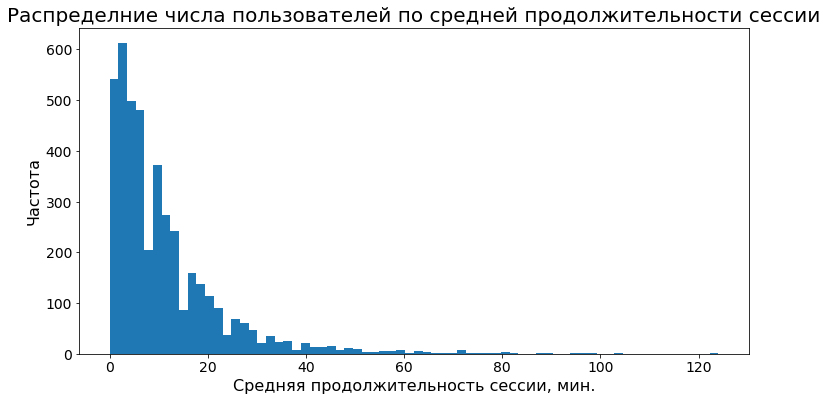

In [59]:
plt.figure(figsize=(12,6))

plt.hist(ses_dur_avg['duration_avg'], bins=70)

plt_design(title='Распределние числа пользователей по средней продолжительности сессии',
               title_size=20, 
               xlabel='Средняя продолжительность сессии, мин.', 
               ylabel='Частота'
               )

total_avg_dur_mean = ses_dur_avg['duration_avg'].mean().round(2)
print(f"Средняя продолжительность сессии уникального пользователя: {total_avg_dur_mean}")


Из графика следует, что средняя продолжительность сессии одного пользователя в основном составляет меньше 40 минут. Большое число людей не проводят больше 10 минут в приложении. 

<a id="3.3"></a> 
### Частота действий

Выясним, как часто пользователи совершают события в приложении. Для этого сгруппируем данные по датам и посчитаем количество событий в день. 


In [60]:
# создадим дополнительный столбец с датой:
df['dt'] = pd.to_datetime(df['event_time']).dt.date

# сгруппируем данные по дате и посчитаем количество событий в тот или иной день:
event_frequency = df.groupby('dt', as_index=False)['event_name'].count()
event_frequency.columns=['dt', 'event_cnt']
event_frequency.head()

,dt,event_cnt
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


Чтобы показать динамику за весь наблюдаемый период, построим линейный график:

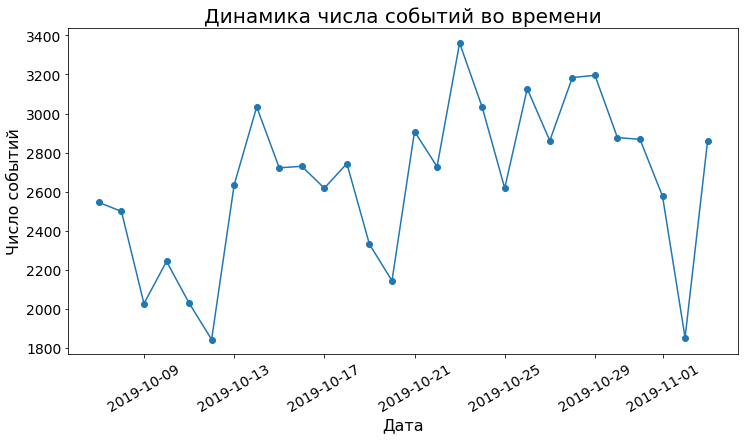

In [61]:
plt.figure(figsize=(12,6))

x = event_frequency['dt']
y = event_frequency['event_cnt']
plt.plot(x,y,'o-')

plt_design(title='Динамика числа событий во времени',
               title_size=20, 
               xlabel='Дата', 
               ylabel='Число событий',
               xrot=30
               )
plt.show()

Из графика видно:
- Число событий на сайте в течение всего времени непостоянно;
- Можно выделить 14 октября, 23 октября и 3 ноября – в эти даты наблюдается резкий рост количества событий в день;
- Также можно выделить резкие спады числа событий: 12 октября, 20 октября, 2 ноября. 

<a id="3.4"></a> 
### Конверсия в целевое действие — просмотр контактов

Выясним конверсию всех пользователей в пользователей, дошедших до шага `contact_show`. Для этого разделим число  пользователей, дошедших до шага `contact_show` на число всех уникальных пользователей: 


In [62]:
conversion(df)

Конверсия всех пользователей  в пользователей, дошедших до действия "contact_show": 22.85%


<a id="3.5"></a> 
### Вывод

На данном этапе были установлены следующие наблюдения относительно пользовательского поведения в приложении:
- Пользователи, пришедшие на первой неделе показывают лучшее удержание на протяжении всего наблюдения относитьльно других когорт. На начало второй недели - 27%. На начало третьей недели - 16.82%. Вторая когорта не сильно отстаёт - rr=15.45%. Показатели третьей когорты сильно снизились относительно показателей на предыдущий лайфтайм (с 24% до 8.89%). На начало третьей недели первая когорта так же имеет более высокий показатель удержания относительно показателя второй когорты: 10.97% против 7.05%. Только первая когорта "дожила" до 28-ого дня. В первой когорте на 28 день осталось около 7% всех пользователей.
- В среднем пользователь проводит около 11 минут в приложении;
- Число событий на сайте в течение всего времени наблюдения непостоянно;
- Около 23% всех пользователей доходят до целевого действия "показать контакты". 

<a id="segments"></a> 
## Сегментация
Разделим всех пользователей на 3 сегмента по количеству совершенных сессий в приложении. И для этих сегментов получим метрики: удержание и конверсию в целевое действие. 

Для этого проделаем следующие шаги:
- Сгруппировать всех пользователей по количеству сессий в приложении;
- Посчитать число сессий у каждого пользователя: сгруппировать все данные по `user_id` , посчитать уникальные `session_id`;
- Чтобы выделить 3 группы, нужно посмотреть распредееление пользователей по количеству сессий. Для этого можно построить гистограму;
- Отнести их к одной из 3 групп: 1 группа, 2 группа, 3 группа; (пороговые значения выяснятся, когда получим весь диапазон значений)
- Рассчитать для этих групп удержание;
- Рассчитать для каждой группы конверсию.

Такое сегментирование будет полезно для исследования влияния количества сессий, например, на конверсию в целевое действие. Число сессий  связано с возвращением в приложение. Если пользователь возвращается в приложение, увеличивается вероятность того, что он увидит нужное предложение. Отсюда можно предположить, что пользователи с бОльшим числом сессий вероятнее будут доходить до целевого действия. Далее мы сравним показатели удержания и конверсии в трех сегментах, различающихся по числу проведенных сессий. Удержание в группе с бОльшим числом сессий будет больше: пользователь по определению проделывает больше сессий, то есть "удерживается" в приложении – проверим это далее.  Если предположения подтвердятся, следует поработать над увеличением числа сессий пользователя (рассылки, программа лояльности и т.д.), над удержанием уже имеющихся пользователей. 

In [63]:
# Группируем пользователей по user_id, считаем уникальные сессии для каждого
ungrouped_data = df.groupby('user_id', as_index=False)['session_id'].nunique()
ungrouped_data.columns=['user_id', 'session_cnt']

# Посмотрим, какие min и max значения session_cnt и на основе этих значений выделим 3 группы
print('min число сессий у пользователей:', ungrouped_data['session_cnt'].min())
print('max число сессий у пользователей:', ungrouped_data['session_cnt'].max())

ungrouped_data['session_cnt'].sort_values().unique()

min число сессий у пользователей: 1
max число сессий у пользователей: 116


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  37,  38,  40,  45,  46,  55,
        58,  79, 116])

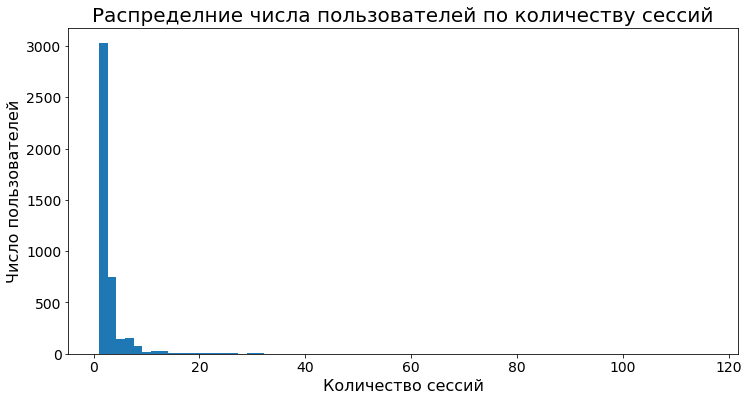

In [65]:
plt.figure(figsize=(12,6))

plt.hist(ungrouped_data['session_cnt'], bins=70)

plt_design(title='Распределние числа пользователей по количеству сессий',
               title_size=20, 
               xlabel='Количество сессий', 
               ylabel='Число пользователей'
               );

Из гистограмы видно, что большинство людей проводят всего один сеанс в приложении. Уже на отметке 5 сессий количесво людей уменьшается на порядок. Важно выделить группы так, чтобы число уникальных пользователей самой малой группы составляло не менее 10% от самой большой. Учитывая это, выделим три группы: 
- 1 группа – совершено всего от 1 сессии до 3;
- 2 группа – совершено от 4 до 5 сессий;
- 3 группа – совершено более 5 сессий

In [32]:
# соединим с первой даблицей df, чтобы не потерять данные о событиях:
ungrouped_data = ungrouped_data.merge(df, on='user_id', how='left')

# получаем три сегмента: 
segment_1 = ungrouped_data[(ungrouped_data['session_cnt'] >= 1) & (ungrouped_data['session_cnt'] <= 3)]  
segment_2 = ungrouped_data[(ungrouped_data['session_cnt'] > 3) & (ungrouped_data['session_cnt'] <= 5)] 
segment_3 = ungrouped_data[ungrouped_data['session_cnt'] > 5] 

In [33]:
# число пользователей в каждой из групп:
segment_1['user_id'].nunique() , segment_2['user_id'].nunique(), segment_3['user_id'].nunique()

(3513, 405, 375)

<a id="4.1"></a> 
### Рассмотрение сегментов по retention rate
Теперь для каждого сегмента найдем Retention rate.

#### Рассчет retention rate для сегмента 1

,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.147700,0.053269,0.031477,0.029056
2019-10-10,1.0,0.122286,0.058286,0.025143,0.000000
2019-10-17,1.0,0.135076,0.027233,0.000000,0.000000
2019-10-24,1.0,0.098494,0.000000,0.000000,0.000000
2019-10-31,1.0,0.000000,0.000000,0.000000,0.000000


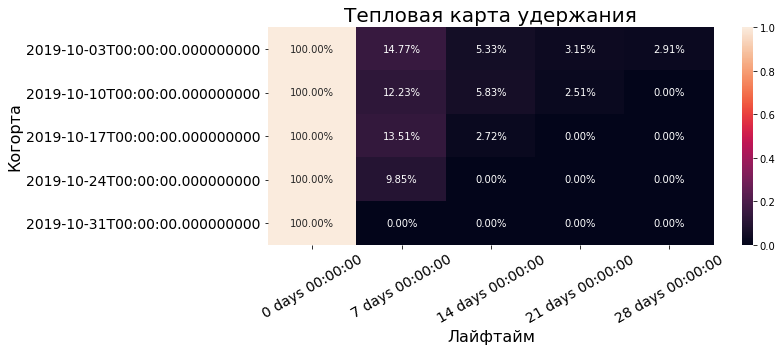

In [34]:
RR(segment_1).head()

- По графику видно, что лучшее удержание на седьмой день показали пользователи, пришедшие на первой неделе, а на 14 — пришедшие на второй. Также на а 21-ый день результаты первых двух когорт почти сравнялись: 5.33% против 5.83%.
- Во всех когортах показатели RR на 14-ый день относительно 7-ого дня упали на примерно 10%.
- В четвертой когорте удержание седьмого дня составляет менее 10%.
- У первой когорты в последний лайфтайм (28 день) удержание составляет около 3%.

#### Рассчет retention rate для сегмента 2

,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.529412,0.397059,0.250000,0.132353
2019-10-10,1.0,0.500000,0.377049,0.131148,0.000000
2019-10-17,1.0,0.535088,0.236842,0.000000,0.000000
2019-10-24,1.0,0.443038,0.000000,0.000000,0.000000
2019-10-31,1.0,0.000000,0.000000,0.000000,0.000000


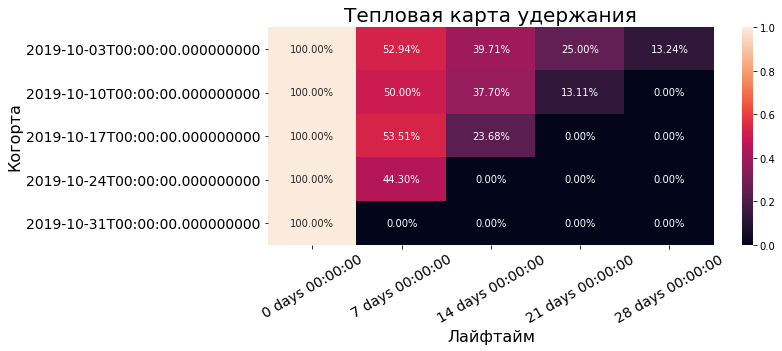

In [35]:
RR(segment_2).head()

- У второго сегмента по тепловой карте видно, что удержание на начало второй недели лучше относительно показателей первого сегмента и составляет около 50% во всех когортах. 
- Наилучшее удержание на 7 день демонстрируют пользователи третьей когорты: 53.5%; наихудшее – пользователи от четвертой когорты (44.3%).
- На начало 3-ей недели у первых двух когорт RR не сильно различается (39.7% и 37.7% соотв.) и снизился относительно предыдущего лайфтайма (7 день) примерно на 13%. Удержание третьей когорты на третий лайфтайм снизился на 30% относительно показателей на 7 день. 
- Удержание на последний лайфтайм у первой когорты составляет 13.24%. Относительно показателя первой когорты в послейдний лайфтайм первого сегмента (≈3%) в этом сегменте удержание выше.

#### Рассчет retention rate для сегмента 3

,0 days 00:00:00,7 days 00:00:00,14 days 00:00:00,21 days 00:00:00,28 days 00:00:00
first_ts,,,,,
2019-10-03,1.0,0.772727,0.651515,0.454545,0.272727
2019-10-10,1.0,0.764228,0.617886,0.333333,0.000000
2019-10-17,1.0,0.846154,0.471154,0.000000,0.000000
2019-10-24,1.0,0.777778,0.000000,0.000000,0.000000
2019-10-31,1.0,0.000000,0.000000,0.000000,0.000000


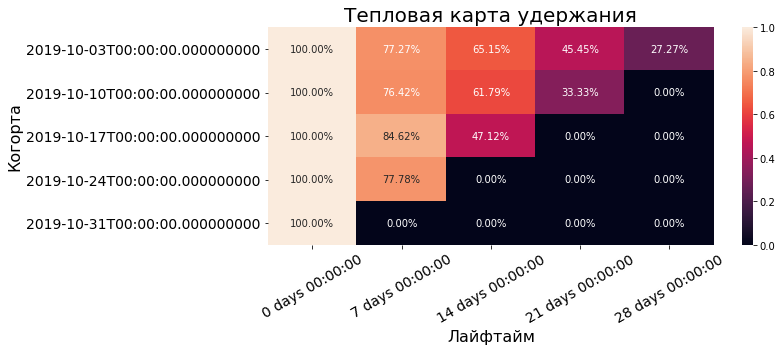

In [36]:
RR(segment_3).head()

- По тепловой карте видно, что удержание у третьего сегмента относительно показателей первых двух сегментов наилучшее. На начало второй недели у всех когорт удержание составляет около 80%. 
- Наилучшее удержание на начало второй недели демонстрируют пользователи, пришедшие третьей когорты 84%. Пользователи других когорт – почти одинаковые показатели (около 77%).
- На 14 день удержание лучше у пользовательй, пришедших в первую неделю, и составляет 65.15%. Наихудший показатель удержания у тртьей когорты – 47.12%. Показатель RR снизилсяна 37% относительно второго лайфтайма.
- На 21 день удержание первой когорты – 45.45%, второй 33.33%. 
- На последний лайфтайм первая когорта имеет показатель удержания 27.27%. Наивысшее значение относительно других сегментов. 

<a id="4.2"></a> 
### Рассмотрение сегментов по конерсии в целевое действие

In [37]:
conversion(segment_1, 'сегмента 1')
conversion(segment_2, 'сегмента 2')
conversion(segment_3, 'сегмента 3')

Конверсия всех пользователей сегмента 1 в пользователей, дошедших до действия "contact_show": 18.33%
Конверсия всех пользователей сегмента 2 в пользователей, дошедших до действия "contact_show": 34.07%
Конверсия всех пользователей сегмента 3 в пользователей, дошедших до действия "contact_show": 53.07%


Группа пользователей первого сегмента (1-3 сессии) имеют самую низкую конверсию: 18.3%. Группа пользователей второго сегмента (4-5 сессий) имеют среднюю конверсию: 34.07%. Группа пользователей, посетивших приложение более 5 сессий (3 группа) имеют самую высокую конверсию: 53.07%. Размеры второго и третьего сегмента различаются незначительно (405 и 375 уникальных пользователей соотв.), а разница в показателях конверсии около 20% в пользу третьей группы.

<a id="4.3"></a> 
### Вывод

На данном этапе мы разделили всех пользователей на 3 сегмента в зависимости от числа проведенных в приложении сессий: **сегмент 1** – совершено от 1 сессии до 3; **сегмент 2** – совершено от 4 до 5 сессий; **сегмент 3** – совершено более 5 сессий. Далее мы рассчитали две метрики для кажого из сегментов: удержание и конверсию. В результате установлено:
- Показатели удержания в соответствующие лайфтаймы лучше у третьего сегмента относительно первых двух. Для сравнения можно посмотреть на второй лайфтайм во всех когортах: сегмент 1 – RR не достигает 15%; сегмент 2 – около 50%; сегмент 3 – около 80%. Также можно посмотреть на показатели последнего лайфтайма пользователей первой когорты: сегмент 1 – 2.91%; сегмент 2 – 13.24%; сегмент 3 – 27.27%;
- Конверсия самого маленького по количеству сессий сегмента (сегмент 1) ниже всех прочих (18.3%.), при бОльшем числе пользователей. Конверсия наибольшего по количеству сессий сегмента (сегмент 3) – самая высокая (53.07%). Размеры второго и третьего сегмента различаются незначительно (405 и 375 уникальных пользователей соотв.), а разница в показателях конверсии около 20% в пользу третьего сегмента.

<a id="hypotheses"></a> 
## Проверка гипотез

<a id="5.1"></a> 
###  Гипотеза 1
Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

Сформулируем нулевую и альтернативную гипотезы: **$H_0$ - конверсия в просмотры котактов пользователей из разных источников (yandex и  gooogle) одинакова; $H_1$ - две эти группы демонстрируют разную конверсию в просмотры контактов.**

In [38]:
# функция для подсчета всех пользователей из того или иного источника
def user_from_source(source):
    total = df.loc[df['source'] == source,'user_id'].nunique()
    print(f'Число пользователей, пришедших из {source}: {total}')
    return total

In [39]:
# функция для подсчета всех пользователей, сделавших целевое действие, из того или иного источника:
def conversed_users(source):
    conversed_users = df.loc[(df['source'] == source) & (df['event_name'] == 'contacts_show'), 'user_id'].nunique()
    print(f'Число пользователей, пришедших из {source}  и дошедших до просмотра контактов: {conversed_users}')
    return conversed_users

In [40]:
# yandex
# все пользователи от yandex:
y_user_cnt = user_from_source('yandex')

# пользователи от yandex, дошедшие до просмотра контактов:
y_conversed_users = conversed_users('yandex')


# google
# все пользователи от google:
g_user_cnt = user_from_source('google')

# пользователи от google, дошедшие до просмотра контактов:
g_conversed_users = conversed_users('google')

Число пользователей, пришедших из yandex: 1934
Число пользователей, пришедших из yandex  и дошедших до просмотра контактов: 478
Число пользователей, пришедших из google: 1129
Число пользователей, пришедших из google  и дошедших до просмотра контактов: 275


Теперь проверим выдвинутые гипотезы: $H_0$ - конверсия в просмотры котактов пользователей из разных источников (yandex и  gooogle) одинакова; $H_1$ - две эти группы демонстрируют разную конверсию в просмотры контактов.

In [41]:
# задаем критический уровень статистической значимости
alpha = 0.05

successes = np.array([y_conversed_users, g_conversed_users])
users = np.array([y_user_cnt, g_user_cnt])

# пропорция успехов в первой группе:
p1 = successes[0]/users[0]

# пропорция успехов во второй группе:
p2 = successes[1]/users[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (users[0] + users[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users[0] + 1/users[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


H₀ подтвердилась: конверсия в просмотры котактов пользователей из разных источников (yandex и gooogle) одинакова. Получили довольно высокие показатели p-значения. 

<a id="5.2"></a> 
### Гипотеза 2
Можно разделить пользователей по количеству сессий (например, малое, среднее и большое число посещений). Пользователи с бОльшим числом посещений доходят до целевого действия (просмотр контактов) чаще, чем пользователи с меньшим чилом сессий. Проверим гипотезу: выделенные группы демонстрируют разную конверсию в просмотры контактов. 

Сформулируем нулевую и альтернативную гипотезы: **$H_0$ - конверсия в просмотры котактов пользователей с разным числом сессий  одинакова; $H_1$ - группы, различающиеся числом ссесий, демонстрируют разную конверсию в просмотры контактов.**

 В разделе ["Сегментация"](#segments) мы уже получили датасет с информацией о количестве сессий у каждого пользователя - ungrouped_data, а также разделили пользователей на три сегмента по количеству проведенных сессий:
- 1 группа – совершено всего от 1 сессии до 3 (датасет segment_1);
- 2 группа – совершено от 4 до 5 сессий (датасет segment_2);
- 3 группа – совершено более 5 сессий (датасет segment_3).


In [42]:
# функция для подсчета всех пользователей из того или иного сегмента
def segment_user_cnt(data, name='имя сегмента'):
    total = data['user_id'].nunique()
    print(f'Число пользователей из {name}: {total}')
    return total

In [43]:
# функция для подсчета всех пользователей, сделавших целевое действие, из того или иного cегмента:
def conversed_users(data, name='имя сегмента'):
    conversed_users = data.loc[data['event_name'] == 'contacts_show', 'user_id'].nunique()
    print(f'Число пользователей из {name}, дошедших до просмотра контактов: {conversed_users}')
    print('')
    print('')
    return conversed_users

In [44]:
user_cnt_1 = segment_user_cnt(segment_1, 'сегмента 1')
conversed_users_1 = conversed_users(segment_1, 'сегмента 1')

user_cnt_2 = segment_user_cnt(segment_2, 'сегмента 2')
conversed_users_2 = conversed_users(segment_2, 'сегмента 2')

user_cnt_3 = segment_user_cnt(segment_3, 'сегмента 3')
conversed_users_3 = conversed_users(segment_3, 'сегмента 3')

Число пользователей из сегмента 1: 3513
Число пользователей из сегмента 1, дошедших до просмотра контактов: 644


Число пользователей из сегмента 2: 405
Число пользователей из сегмента 2, дошедших до просмотра контактов: 138


Число пользователей из сегмента 3: 375
Число пользователей из сегмента 3, дошедших до просмотра контактов: 199




В данной работе идет **множественная проверка гипотез**, а значит увеличивается риск ложноположительного результата. Чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, применим **поправку Бонферрони**. 

    alpha = 0.05 / 3

In [45]:
# функция для проверки гипотезы:
def hypothesis(successesx,          # дошедшие до просмотра контактов из группы а
               successesy,          # дошедшие до просмотра контактов из группы b
               trialsx,             # все из группы а
               trialsy              # все из группы b
              ):

    alpha = 0.05 / 3  # критический уровень статистической значимости 

    successes = np.array([successesx, successesy])
    trials = np.array([trialsx, trialsy])

    p1 = successes[0]/trials[0]
    p2 = successes[1]/trials[1]
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)
    #print(f'p-value: {"{0:.3f}".format(p_value)}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 
        print()
        print()


Проверим $H_0$: пользователи с разным числом проведенных сессий демонстрируют одинаковую конверсию - **для сегментов 1 и 2.**

In [46]:
hypothesis(conversed_users_1,
           conversed_users_2,
           user_cnt_1,
           user_cnt_2
          )

p-значение:  6.128431095930864e-14
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза о равенстве конверсий первого сегмента и второго сегмента не подтвердилась. 

Проверим $H_0$: пользователи с разным числом проведенных сессий демонстрируют одинаковую конверсию - **для сегментов 2 и 3.**

In [47]:
hypothesis(conversed_users_2,
           conversed_users_3,
           user_cnt_2,
           user_cnt_3
          )

p-значение:  8.792966665893687e-08
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза о равенстве конверсий второго и третьего сегментов так же не подтвердилась. 

Проверим $H_0$: пользователи с разным числом проведенных сессий демонстрируют одинаковую конверсию - **для сегментов 1 и 3.**

In [48]:
hypothesis(conversed_users_1,
           conversed_users_3,
           user_cnt_1,
           user_cnt_3
          )

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза о равенстве конверсий первого сегмента и третьего сегмента не подтвердилась. 

<a id="5.3"></a> 
### Вывод

- Конверсия в просмотры котактов пользователей из разных источников (yandex и gooogle) одинакова. 
- Все три проверки между сегментами,отличающимися по числу ссесий у польззователя, показали, что разница между показателями конверсии пользователей с разным числом сессий значительна.

<a id="conclusion"></a> 
## Вывод

С помощью данной работы удалось описать поведение пользователей в мобильном приложении "Ненужные вещи". В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.
  
* Исследование общего поведения пользователей по 4-ем метрикам: retention rate; время, проведённое в приложении; частота действий; конверсия в целевое действие — просмотр контактов - показало:
    - Пользователи, пришедшие на первой неделе показывают лучшее удержание на протяжении всего наблюдения относительно других когорт. На начало второй недели удержание во всех когортах приняло значение от 17% до 27%; 
    - В среднем пользователь проводит около 11 минут в приложении. Гистограмма показала, что большинство сессий не достигает и 30 минут;
    - Число событий на сайте в течение всего времени наблюдения непостоянно. Есть даты с большим количеством событий в день:14 октября, 23 октября и 3 ноября; есть даты с малым числом событий в день: 12 октября, 20 октября, 2 ноября. ;
    - Около 23% всех пользователей доходят до целевого действия "показать контакты". 
    
    
* На основе этого были выделены три сегмента по количеству совершенных сессий в приложении. Сегмент 1 – совершено всего от 1 сессии до 3; сегмент 2 – совершено от 4 до 5 сессий; сегмент 3 – совершено более 5 сессий. Для этих сегментов получены метрики: удержание и конверсия в целевое действие.
    - Показатели удержания в соответствующие лайфтаймы лучше у третьего сегмента относительно первых двух. Для сравнения можно посмотреть на второй лайфтайм во всех когортах: сегмент 1 – RR не достигает 15%; сегмент 2 – около 50%; сегмент 3 – около 80%. Показатели последнего лайфтайма пользователей первой когорты: сегмент 1 – 2.91%; сегмент 2 – 13.24%; сегмент 3 – 27.27%;
    - Конверсия самого маленького по количеству сессий сегмента (сегмент 1) ниже всех прочих (18.3%.), при бОльшем числе пользователей. Конверсия наибольшего по количеству сессий сегмента (сегмент 3) – самая высокая (53.07%). Размеры второго и третьего сегмента различаются незначительно (405 и 375 уникальных пользователей соотв.), а разница в показателях конверсии около 20% в пользу третьего сегмента. 
    
    
* Проверены гипотезы о равенстве конверсий в разных группах по определенным признакам:
    - Гипотеза 1 - о равенстве конверсий между группами пользователей,пришедших из разных источников (yandex  и google) - подтвердилась. Обе группы (из yandex  и google) демонстрируют одинаковую конверсию в просмотры контактов. Источник привлечения пользователей не имеет влияния на показатель конверсии;
    - Гипотеза 2 - о равенстве конверсий между группами, отличающихся числом сессий на одного пользователя - не подтвердилась. Все три проверки между сегментами - сегмент 1 – совершено всего от 1 сессии до 3; сегмент 2 – совершено от 4 до 5 сессий; сегмент 3 – совершено более 5 сессий - показали, что разница между показателями конверсии этих групп значительна. Опираясь на это можно сделать вывод, что количество проведенных в приложении сессий влияет на конверсию.
    
[Ссылка на презентацию](https://drive.google.com/file/d/1wLgaLFEuH8V3NnNax4OdiZu6-zT3Q2TO/view?usp=sharing) \
[Ссылка на дашборд](https://public.tableau.com/app/profile/veronika4962/viz/fp_16805622420110/Dashboard1)

**Рекомендация по развитию приложения в разрезе исследования групп пользователей** 

[Проверка Гипотезы 2](#5.3) показала, что конверсия в целевое действие пользователей с разным числом проведенных в приложении сессий не одинакова. Ранее мы выдвигали предположение, что она тем больше, чем больше число проведенных сессий. Расчет конверсии и удержания в пункте ["Сегментация"](#4.3) так же это подкрепляет. **Из чего следует рекомендация:** следует поработать над удержанием уже пришедших пользователей, увеличить число сессий пользователя (рассылки, уведомления, программа лояльности и т.д.).
